# Lead Scoring Case Study - Predicting Hot Leads for X Education

In [38]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [39]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

## Part 1A : Data Analysis - Analyse & Visualize the features in the Leads Data Set

In [40]:
# Read the data from the CSV file into a DataFrame
leads_df = pd.read_csv("Leads.csv")

In [41]:
#Get the shape (row and column count of the data)
leads_df.shape

(9240, 37)

In [42]:
#Get the columns wise info - Datatypes and missing values
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [43]:
#Check the sample values using df.head()
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [44]:
#Check the sample values using df.tail()
leads_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [45]:
#Get the distribution of Numerical values
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [46]:
# Check the column wise null percentages.

leads_null_fields= round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [47]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

leads_null_rows=round(((leads_df.isna().sum(axis=1))/leads_df.shape[1]) * 100,2)
print(leads_null_rows[leads_null_rows > 30])

963     32.43
1363    32.43
2633    32.43
2635    32.43
2671    35.14
        ...  
7400    32.43
8203    32.43
8216    32.43
8252    32.43
8544    32.43
Length: 645, dtype: float64


In [48]:
# Check the unique counts for all columns across the data set
for x in leads_df.columns:
    print(x+':',len(leads_df[x].unique()))

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [49]:
# removing the column Prospect ID; Lead Number is a unique value already
leads_df = leads_df.drop('Prospect ID', axis=1)

# removing the five columns which are constant across all rows; they don't add any value to the model
leads_df = leads_df.drop('Magazine', axis=1)
leads_df = leads_df.drop('Receive More Updates About Our Courses', axis=1)
leads_df = leads_df.drop('Update me on Supply Chain Content', axis=1)
leads_df = leads_df.drop('Get updates on DM Content', axis=1)
leads_df = leads_df.drop('I agree to pay the amount through cheque', axis=1)

In [50]:
leads_df.shape

(9240, 31)

In [51]:
# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

leads_df = leads_df[leads_df.isnull().sum(axis=1) <= 10]
leads_df.shape

(8576, 31)

### Univariate Analysis of Categorical variables

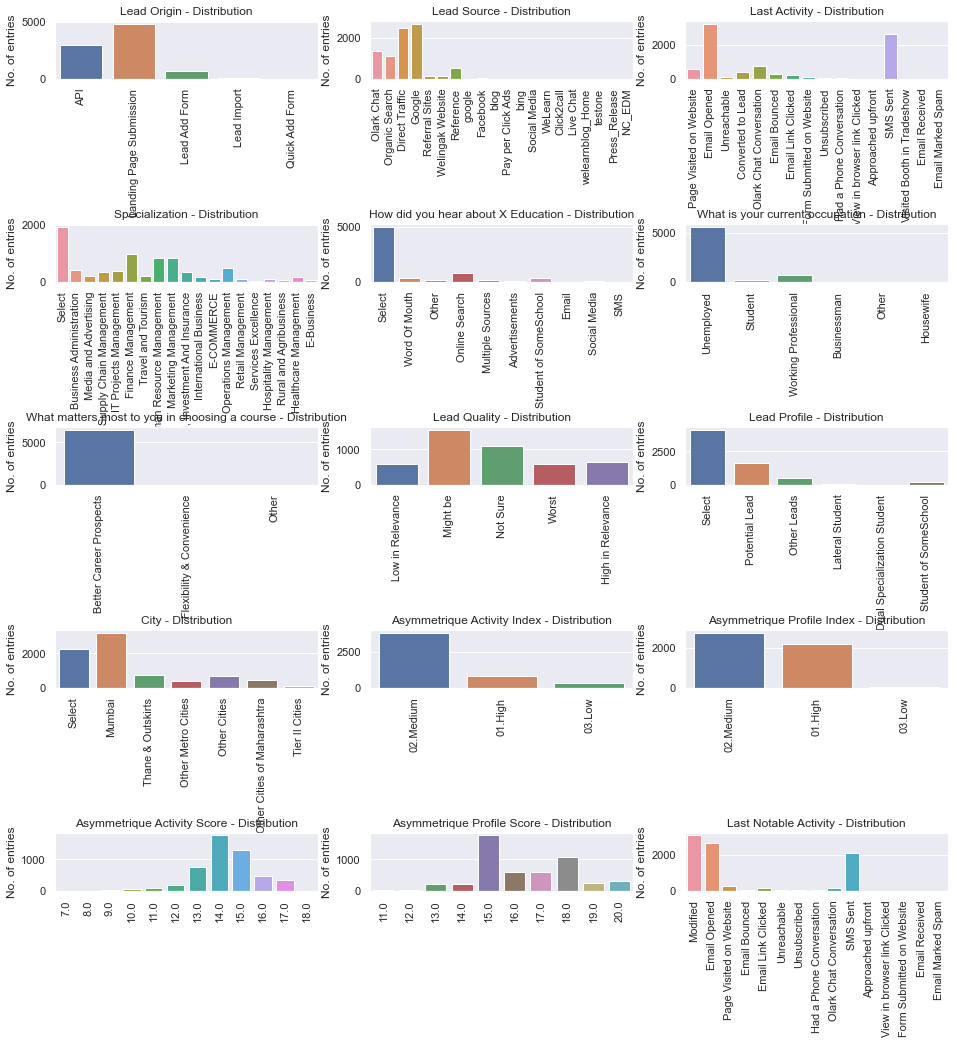

In [52]:
# Check the distribution of Categorical variables to get an idea of how the values are spread
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=leads_df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

##### From the above Univariate Analysis of Categorical variables, we can see that a value called "Select" is present in some of the fields. This is  a drop-down value which was left as it is same as a missing value. We can consider it as NaN for all Practical purposes.

In [53]:
# Assign the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    leads_df[x].replace('Select',np.NaN,inplace=True)

In [54]:
# Check the column wise null percentages. And start handling the NULL values

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
City                                             35.13
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


##### Bivariate Analysis of Categorical variables

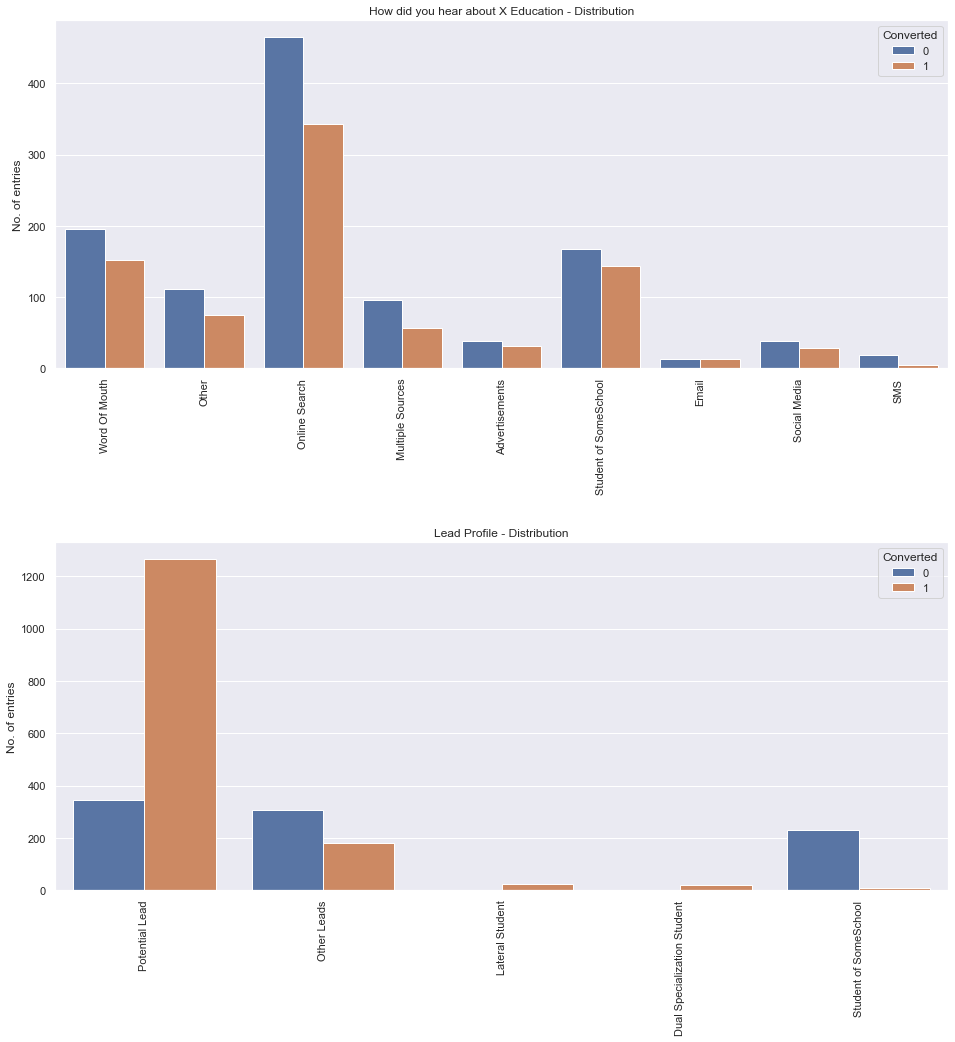

In [55]:
# Check the variables with very high NULL values
col_list_for_count3=['How did you hear about X Education','Lead Profile']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of these two categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [56]:
# Drop the columns with more than 50% NULL values & adding no value to the Model

# Drop "How did you hear about X Education" column as it has very high NULL values & doesn't have much inference from it
leads_df=leads_df.drop('How did you hear about X Education',axis=1)

In [58]:
# Check the values of Asymmetric Index and Score
print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Activity Score'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())
print(leads_df['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


#### Clean the values in Asymmetric  Columns

In [59]:
## Update the values in Assymmetrique columns
assymm_index_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
leads_df[assymm_index_list] = leads_df[assymm_index_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


#### The Assymetrique Scores are already grouped by Asymmetrique Index columns. So, we can drop the Scores.

In [60]:
# Drop the Asymmetrique columns with score values - as they are already explained by Index columns

leads_df=leads_df.drop('Asymmetrique Activity Score',axis=1)
leads_df=leads_df.drop('Asymmetrique Profile Score',axis=1)

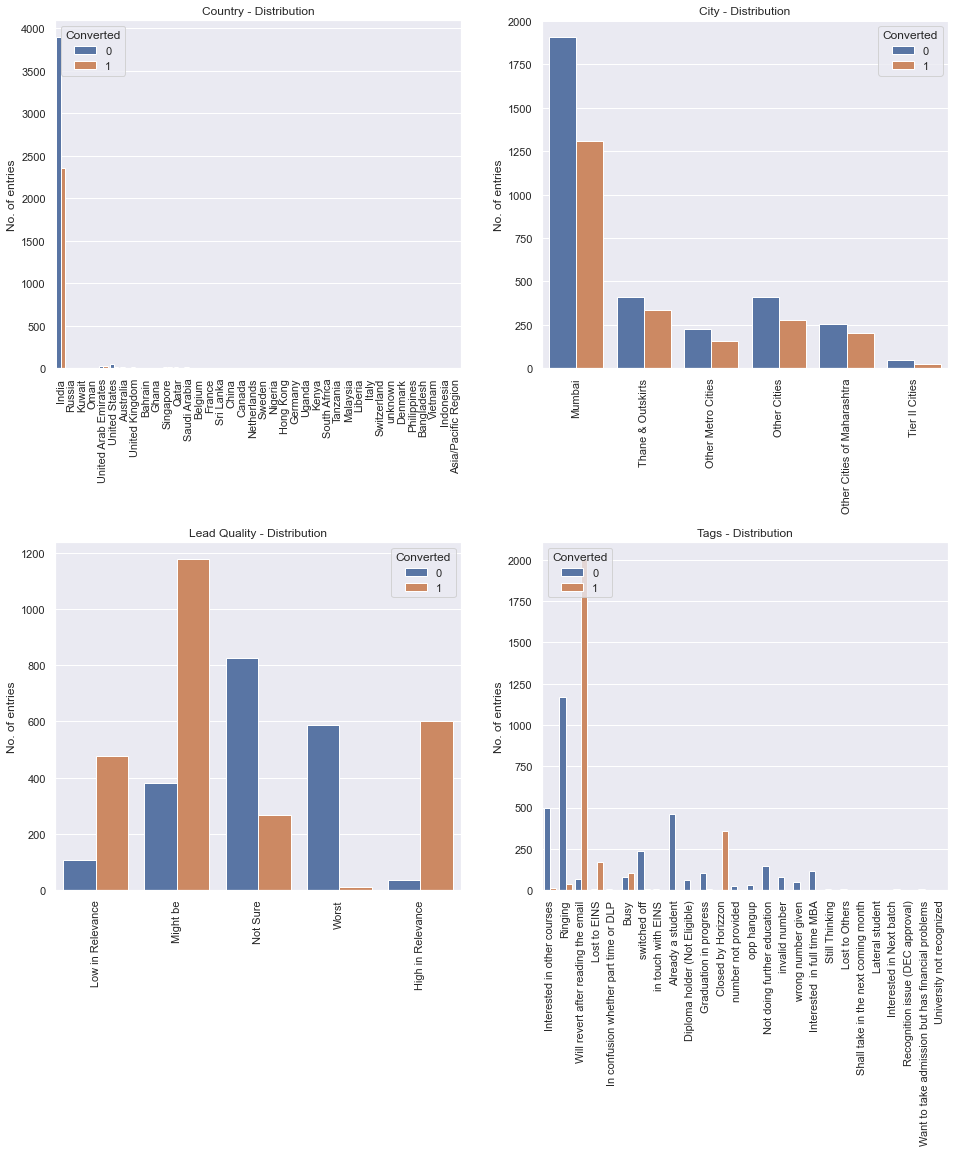

In [61]:
col_list_for_count2=['Country','City','Lead Quality','Tags']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count2)):
    plt.subplot(2, 2, i+1)
    var=col_list_for_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)